# Oblig 2 - Forutse huspriser i Ames, USA

## Innhold
1. [Import av data](#import)
2. [Visualisering av data](#visualisering)
3. [Håndtering av manglende verdier](handtering)
4. [Normalitet og transformasjon av distribusjoner](#normalitet)
5. [Skaleringsfunksjon](#skalering)
6. [Valg og trening av modell](#modell)

## 1 Import av data <a name="import"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [4]:
import cufflinks as cf

In [5]:
# For Notebooks
init_notebook_mode(connected=True)

# For offline use
cf.go_offline()

In [6]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

## 2 Visualisering av data <a name="visualisering"></a>

In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


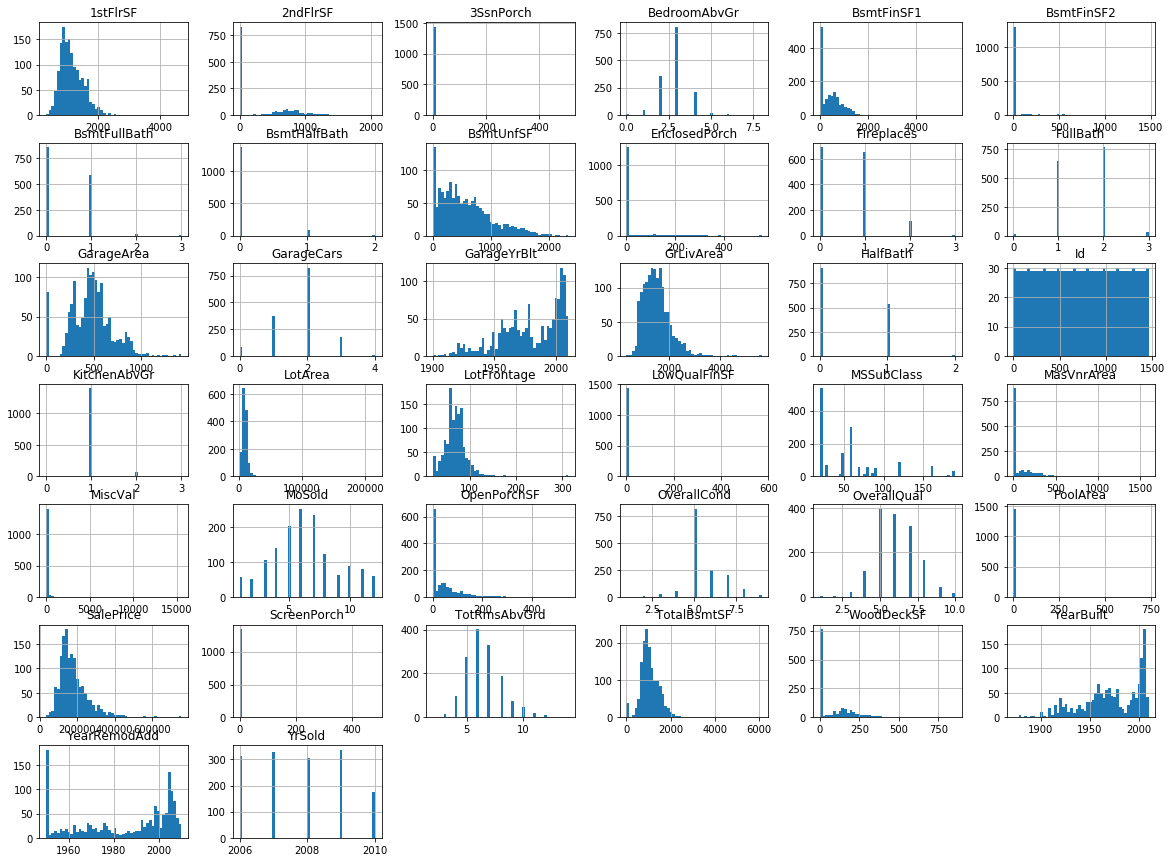

In [10]:
train.hist(bins=50, figsize=(20,15))
plt.show()

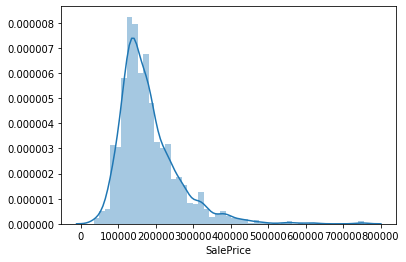

In [11]:
sns.distplot(train['SalePrice'])

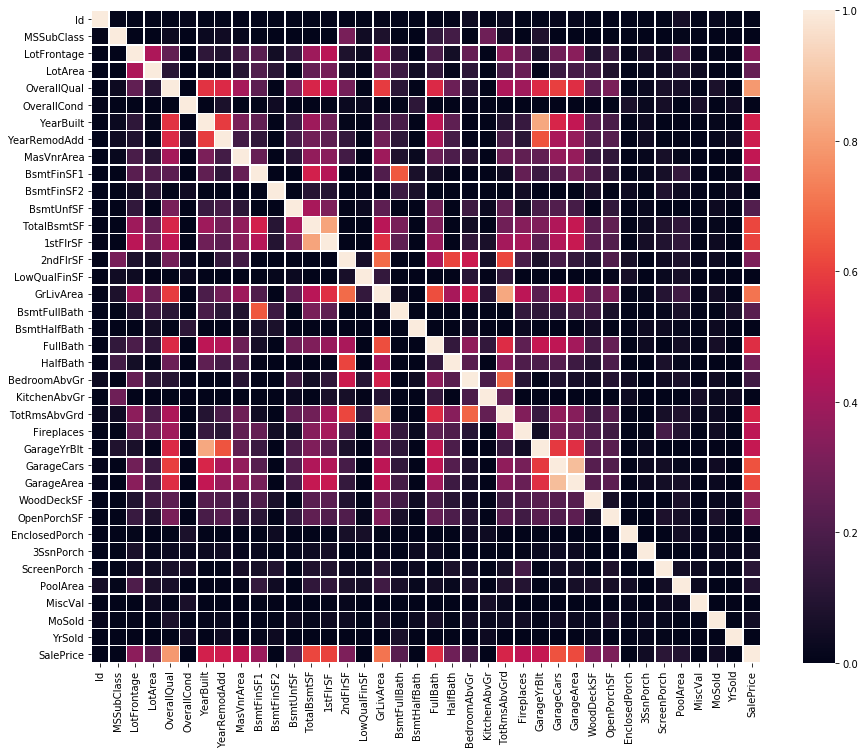

In [12]:
fig, ax = plt.subplots(figsize=(15, 12))
corr = train.corr()
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1)

In [ ]:
cols = corr.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### 2.3 Lineære relasjoner

In [ ]:
train.iplot(kind='scatter', x='GrLivArea', y='SalePrice', mode='markers', title='GrLivArea VS SalePrice', xTitle='GrLivArea', yTitle='SalePrice', size=10)

In [ ]:
train.drop(train[train.GrLivArea>4000].index, inplace = True)
train.reset_index(drop = True, inplace = True)

In [ ]:
train.iplot(kind='scatter', x='TotalBsmtSF', y='SalePrice', mode='markers', title='TotalBsmtSF VS SalePrice', xTitle='TotalBsmtSF', yTitle='SalePrice', size=10)

In [ ]:
train.drop(train[train.TotalBsmtSF>3000].index, inplace = True)
train.reset_index(drop = True, inplace = True)

In [ ]:
train.iplot(kind='scatter', x='YearBuilt', y='SalePrice', mode='markers', title='YearBuilt VS SalePrice', xTitle='YearBuilt', yTitle='SalePrice', size=10)

In [ ]:
train.drop(train[train.YearBuilt<1900].index, inplace = True)
train.reset_index(drop = True, inplace = True)

In [ ]:
train.iplot(kind='scatter', x='GarageCars', y='SalePrice', mode='markers', title='GarageCars VS SalePrice', xTitle='GarageCars', yTitle='SalePrice', size=10)

In [ ]:
train.iplot(kind='scatter', x='OverallQual', y='SalePrice', mode='markers', title='OvarallQual VS SalePrice', xTitle='OverallQual', yTitle='SalePrice', size=10)

In [ ]:
train.iplot(kind='scatter', x='FullBath', y='SalePrice', mode='markers', title='Fullbath VS SalePrice', xTitle='Fullbath', yTitle='SalePrice', size=10)

## 3 Håndtering av manglende verdier <a name="handtering"></a>
(Litt om håndtering av manglende verdier)

Før vi begynner med å håndtere de manglende verdiene og rensing av dataene, lager vi y-tabell med det vi skal forutse.

In [ ]:
y_train = train.SalePrice

Noe tekst her

In [ ]:
train.drop('SalePrice', axis = 1, inplace = True)
merged = pd.concat([train, test], axis = 0)

merged.shape

In [ ]:
merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype('object')
merged.dtypes.value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(merged.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Vi kan se over at det er en god del "hull" i dataene, med nullverdier. For å få en bedre oversikt, lager vi en tabell som viser hvor mange nullverdier de forskjellige har:

In [ ]:
missing_columns = len(merged) - merged.loc[:, np.sum(merged.isnull())>0].count()
x = missing_columns.index
y = missing_columns
missing_columns

Vanligvis pleier man å droppe variabler hvor vi mangler minst 40% av verdiene. I dette tilfellet er NaN-verdiene brukt med vilje for å beskrive visse ting, som for eksempel at NaN i Alley betyr No Alley Access. For å unngå å droppe variabler som kan ha en betydning, gjør vi om NaN til None.

In [ ]:
impute_none = merged.loc[:, ['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageCond','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']]
for i in impute_none.columns:
    merged[i].fillna('None', inplace = True)

In [ ]:
impute_mode =  merged.loc[:, ['Electrical', 'MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional', 'SaleType']]
for i in impute_mode.columns:
    merged[i].fillna(merged[i].mode()[0], inplace = True)

In [ ]:
impute_median = merged.loc[:, ['BsmtFullBath','BsmtHalfBath', 'GarageCars', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']]
for i in impute_median.columns:
    merged[i].fillna(merged[i].median(), inplace = True)

Vi sjekker om noen kolonner ikke er behandlet så langt:

In [ ]:
print('Manglende verdier som ikke er behandlet: ', merged.columns[merged.isna().any()].values)

In [ ]:
merged['LotFrontage'] = merged.groupby(['BldgType'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [ ]:
print('Manglende verdier som ikke er behandlet: ', merged.columns[merged.isna().any()].values)

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(merged.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## 4 Normalitet og transformasjon av distribusjoner <a name="normalitet"></a>

In [ ]:
print("Skeivhet: %f" % y.skew())
print("Kurtosis: %f" % y.kurt())

In [ ]:
y_train.iplot(kind='hist', bins=60)

In [ ]:
y_train = np.log(y_train)
y_train.iplot(kind='hist', bins=60)

In [ ]:
skew_num = pd.DataFrame(data = merged.select_dtypes(include = ['int64', 'float64']).skew(), columns=['Skewness'])

skew_num_sorted = skew_num.sort_values(ascending = False, by = 'Skewness')
skew_num_sorted

In [ ]:
merged_num = merged.select_dtypes(include = ['int64', 'float64'])
merged_skewed = np.log1p(merged_num[merged_num.skew()[merged_num.skew() > 0.5].index])

#Normal variables
merged_normal = merged_num[merged_num.skew()[merged_num.skew() < 0.5].index]
    
#Merging
merged_num_all = pd.concat([merged_skewed, merged_normal], axis = 1)

In [ ]:
merged_num.update(merged_num_all)

## 5 Skaleringsfunksjon <a name="skalering"></a>
Vi har nå komt ganske langt i prosessen med å gjøre dataene klare for maskinlæringsalgoritmene. Men det gjenstår fortsatt noe viktig: Alle kategoriske verdier må endres til tallverdier, slik at maskinlæringsalgoritmene kan forstå de.

In [ ]:
merged.head(10)

In [ ]:
merged.dtypes

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaler.fit(merged_num)

merged_num_scaled = scaler.transform(merged_num)

In [ ]:
merged_num_scaled = pd.DataFrame(data = merged_num_scaled, columns = merged_num.columns, index = merged_num.index)

Vi begynner med label-encoding. Vi tar de kategoriske verdiene og gjør de om til integers.

In [ ]:
merged_cat = merged.select_dtypes(include = ['object']).astype('category')

merged_cat.LotShape.replace(to_replace = ['IR3', 'IR2', 'IR1', 'Reg'], value = [0, 1, 2, 3], inplace = True)
merged_cat.LandContour.replace(to_replace = ['Low', 'Bnk', 'HLS', 'Lvl'], value = [0, 1, 2, 3], inplace = True)
merged_cat.Utilities.replace(to_replace = ['NoSeWa', 'AllPub'], value = [0, 1], inplace = True)
merged_cat.LandSlope.replace(to_replace = ['Sev', 'Mod', 'Gtl'], value = [0, 1, 2], inplace = True)
merged_cat.ExterQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
merged_cat.ExterCond.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
merged_cat.BsmtQual.replace(to_replace = ['None', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
merged_cat.BsmtCond.replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
merged_cat.BsmtExposure.replace(to_replace = ['None', 'No', 'Mn', 'Av', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
merged_cat.BsmtFinType1.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
merged_cat.BsmtFinType2.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
merged_cat.HeatingQC.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
merged_cat.Electrical.replace(to_replace = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'], value = [0, 1, 2, 3, 4], inplace = True)
merged_cat.KitchenQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
merged_cat.Functional.replace(to_replace = ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
merged_cat.FireplaceQu.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
merged_cat.GarageFinish.replace(to_replace =  ['None', 'Unf', 'RFn', 'Fin'], value = [0, 1, 2, 3], inplace = True)
merged_cat.GarageQual.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
merged_cat.GarageCond.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
merged_cat.PavedDrive.replace(to_replace =  ['N', 'P', 'Y'], value = [0, 1, 2], inplace = True)
merged_cat.PoolQC.replace(to_replace =  ['None', 'Fa', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
merged_cat.Fence.replace(to_replace =  ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], value = [0, 1, 2, 3, 4], inplace = True)

In [ ]:
merged_cat.loc[:, ['OverallQual', 'OverallCond']] = merged_cat.loc[:, ['OverallQual', 'OverallCond']].astype('int64')
merged_label_encoded = merged_cat.select_dtypes(include = ['int64'])

One-hot-encoding:

In [ ]:
merged_one_hot = merged_cat.select_dtypes(include=['category'])
merged_one_hot = pd.get_dummies(merged_one_hot, drop_first=True)

In [ ]:
merged_encoded = pd.concat([merged_one_hot, merged_label_encoded], axis=1)
merged_processed = pd.concat([merged_num_scaled, merged_encoded], axis=1)

In [ ]:
merged_processed.shape

Nå kan vi hente inn trenings og testdata for modellering. y er målvariabelen.

In [ ]:
train_final = merged_processed.iloc[0:1438, :]
test_final = merged_processed.iloc[1438:, :]
y_train = y_train

In [ ]:
train_final.head()

In [ ]:
test_final.head()

## 6 Valg av modell og trening av modell <a name="modell"></a>

In [ ]:
train_final.shape

In [ ]:
y_train.shape

In [ ]:
seed = 44

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = train_final
y = y_train
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = seed)

In [ ]:
rfr.fit(X_train, y_train)

In [ ]:
prediction = rfr.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, prediction))